<a href="https://colab.research.google.com/github/ueqbe/gesture_detection/blob/main/gesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[ 70,  78,  79, ...,  37,  38,  35],
       [ 84,  90,  94, ...,  34,  35,  34],
       [ 97,  98, 102, ...,  32,  31,  35],
       ...,
       [ 87, 104,  92, ...,  85,  89,  97],
       [103, 115,  93, ...,  92,  81,  88],
       [107, 109, 104, ...,  89, 103,  74]], dtype=uint8)
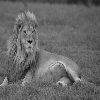

In [ ]:
# @title Load the desired gesture representation(template)
template = cv2.imread('/content/drive/MyDrive/db/Lion_pose_6649531395.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.resize(template, (100, 100))
template

In [ ]:
template.shape

(100, 100)

In [ ]:
# @title Load the test video
test_video=cv2.VideoCapture('/content/drive/MyDrive/db/istockphoto-1042844098-640_adpp_is.mp4')

In [ ]:
# @title Method to preprocess video frames
def preprocess_frame(frame):
    """
    Preprocesses a video frame by converting it to grayscale and resizing it.

    Args:
    frame: Input video frame.

    Returns:
    Preprocessed frame (grayscale and resized).
    """
    if len(frame.shape) == 3:  # Check if the image has three channels
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
        gray_frame = frame  # Already in grayscale
    resized_frame = cv2.resize(gray_frame, (100, 100))
    return resized_frame





array([[ 70,  78,  79, ...,  37,  38,  35],
       [ 84,  90,  94, ...,  34,  35,  34],
       [ 97,  98, 102, ...,  32,  31,  35],
       ...,
       [ 87, 104,  92, ...,  85,  89,  97],
       [103, 115,  93, ...,  92,  81,  88],
       [107, 109, 104, ...,  89, 103,  74]], dtype=uint8)
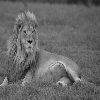

In [ ]:
# @title preprocess the template
template=preprocess_frame(template)
template

In [ ]:
template.shape

(100, 100)

In [ ]:
# @title Define the LSTM Model architecture
"""Create an LSTM model for gesture detection.

Returns:
    model (Sequential): LSTM model with specified architecture.
"""
model=Sequential()
model.add(LSTM(128, input_shape=(100, 100), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(optimizer=Adam(), loss='binary_crossentropy')

In [ ]:
# @title Method to detect the gesture using LSTM
def detect_gesture(frames):
  """
  Detects a gesture in a sequence of frames using a pre-trained LSTM model.

  Args:
  frames: Sequence of preprocessed video frames.

  Returns:
  Predictions indicating the presence of the gesture in the frames
  """
  frames=np.expand_dims(frames, axis=0)
  predictions=model.predict(frames)
  return predictions

1/1 [==============================] - 1s 779ms/step


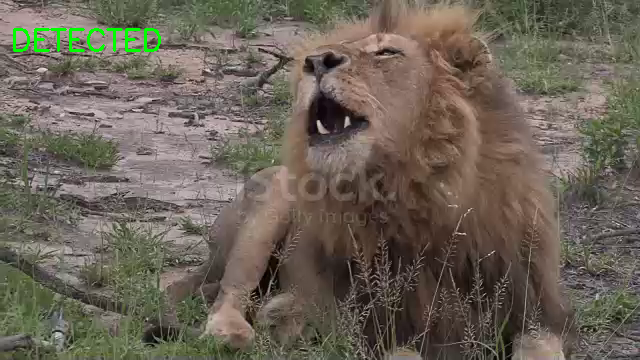

1/1 [==============================] - 0s 29ms/step


In [ ]:
# @title Process each frame of the test video
while test_video.isOpened():
  ret, frame=test_video.read()
  if not ret:
    break
  #Preprocess the frame
  processed_frame=preprocess_frame(frame)
  #Use the LSTM model to detect the gesture in a sequence of frames
  predictions=detect_gesture(processed_frame)
  #Check if any element in predictions is greater than 0.5
  if np.any(predictions>0.5):
    cv2.putText(frame, 'DETECTED', (10,50), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
  #Display the frame using cv2_imshow
  cv2_imshow(frame)

  if cv2.waitKey(1) & 0xFF==ord('q'):
    break
  #Release resources
  test_video.release()
  cv2.destroyAllWindows()